In [2]:
import mujoco
import mujoco.viewer
import numpy as np
import time

import mediapy as media

In [ ]:
# Load the scene file which includes both the robot and floor
model = mujoco.MjModel.from_xml_path("simplerobot/scene.xml")
data = mujoco.MjData(model)

# mujoco.mj_resetData(model, data)

# mujoco.mj_resetDataKeyframe(model, data, 0)

# Apply a control to the 'knee' joint to make it rotate
# Ensure the control value is within the actuator's control range
control_value = 1.0  # Adjust the control value as needed
# data.ctrl[model.actuator('knee_actuator').id] = control_value


model.opt.gravity = (0, 0, -2)


print(f"Applying control: {control_value}")

with mujoco.viewer.launch_passive(model, data) as viewer:
    while viewer.is_running():
        mujoco.mj_step(model, data)
        viewer.sync()


        # Debugging output to check joint position and control
        # print(f"Joint position: {data.qpos[model.joint('knee').qposadr]}")
        # print(f"Control input: {data.ctrl[model.actuator('knee_actuator').id]}")



""

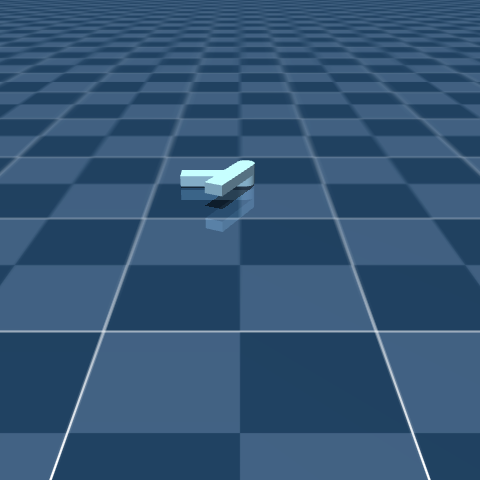

In [28]:
model = mujoco.MjModel.from_xml_path("simplerobot/scene.xml")
data = mujoco.MjData(model)
height = 480
width = 480

with mujoco.Renderer(model, height, width) as renderer:
  mujoco.mj_forward(model, data)
  renderer.update_scene(data, "fixed")

  media.show_image(renderer.render())

In [12]:
n_frames = 180
height = 240
width = 320
frames = []
fps = 60.0
times = []
sensordata = []

# constant actuator signal
mujoco.mj_resetData(model, data)
data.ctrl = 20

# Simulate and display video.
with mujoco.Renderer(model, height, width) as renderer:
  for i in range(n_frames):
    renderer.update_scene(data, "fixed")
    frame = renderer.render()
    frames.append(frame)

media.show_video(frames, fps=fps)